In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
import pandas as pd

In [2]:
# read in csv to be used for model
data = pd.read_csv('data/new_country_data.csv')
data = data.dropna()

In [3]:
# Assign the data to x and y 
X = data[['happiness_score_2015','human_development_index','gdp_percapita_2015','alcohol_consumption_percapita',\
         'health_spending_percapita_2015','private_debt_2015']]
y = data['sui_per_100k_2015'].values.reshape(-1,1)
print(X.shape,y.shape)

(111, 6) (111, 1)


In [4]:
# create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
X_train

,happiness_score_2015,human_development_index,gdp_percapita_2015,alcohol_consumption_percapita,health_spending_percapita_2015,private_debt_2015
15,3.59,0.40,575.31,8.2,33.51,24.91
45,4.57,0.61,1605.61,5.7,58.92,58.55
90,5.12,0.77,5585.12,11.1,491.25,40.50
91,4.51,0.41,588.23,5.7,120.91,5.22
9,6.94,0.89,40441.05,12.1,4290.00,208.92
...,...,...,...,...,...,...
107,6.90,0.84,38663.38,3.8,1385.54,104.37
14,4.22,0.78,6993.78,12.7,521.42,118.92
93,5.85,0.88,20887.52,12.6,1775.86,95.44
52,5.99,0.89,34524.47,8.0,3733.38,153.89


In [6]:
# scale the data for better processing with standardscaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [7]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

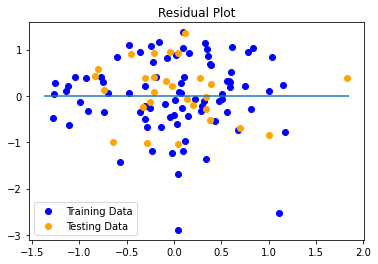

In [8]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [9]:
# quantify the model using the scaled data
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4057530109051795, R2: 0.49326504134159643


In [12]:
# create a normal neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
number_inputs = 6
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [27]:
# compile the model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [28]:
# fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=100
)

Epoch 1/100


ValueError: in user code:

    C:\Users\lakew\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\lakew\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\lakew\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\lakew\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\lakew\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\lakew\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\lakew\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\lakew\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\lakew\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 6)


Training Score: 0.3641380678685079
Testing Score: 0.49326504134423976


Text(0.5, 1.0, 'Residual Plot')

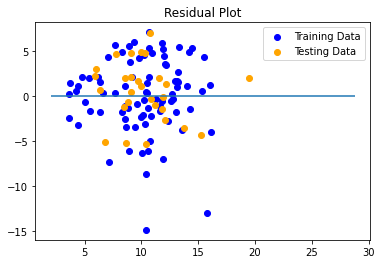

In [11]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")